In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
Downloading...
From: https://drive.google.com/uc?id=1Won6xkyYCcJLJ7eMpVt5VA_4P0tE1nb7
To: /content/data_banknote_authentication.txt
100% 46.4k/46.4k [00:00<00:00, 58.7MB/s]


In [3]:
df = pd.read_csv('/content/data_banknote_authentication.txt')
df

,x1,x2,x3,x4,y
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
shuffled_data = shuffle(df)
shuffled_data.to_csv('created_data.csv', index=False)
print(shuffled_data)

           x1       x2       x3        x4  y
169   0.11739  6.27610 -1.54950 -2.474600  0
567   5.02140  8.07640 -3.05150 -1.715500  0
703   1.31140  4.54620  2.29350  0.225410  0
721  -0.45062 -1.36780  7.08580 -0.403030  0
1348 -2.97860  2.34450  0.52667 -0.401730  1
...       ...      ...      ...       ... ..
875  -1.86290 -0.84841  2.53770  0.097399  1
1100  1.43780  0.66837 -2.02670  1.027100  1
39    3.48050  9.70080 -3.75410 -3.437900  0
639   3.88460 -3.03360  2.53340  0.202140  0
43    0.96441  5.83950  2.32350  0.066365  0

[1372 rows x 5 columns]


In [5]:
df1 = pd.read_csv('/content/created_data.csv')
df1

,x1,x2,x3,x4,y
0,0.11739,6.27610,-1.54950,-2.474600,0
1,5.02140,8.07640,-3.05150,-1.715500,0
2,1.31140,4.54620,2.29350,0.225410,0
3,-0.45062,-1.36780,7.08580,-0.403030,0
4,-2.97860,2.34450,0.52667,-0.401730,1
...,...,...,...,...,...
1367,-1.86290,-0.84841,2.53770,0.097399,1
1368,1.43780,0.66837,-2.02670,1.027100,1
1369,3.48050,9.70080,-3.75410,-3.437900,0
1370,3.88460,-3.03360,2.53340,0.202140,0


Logistic Regression (from Scratch)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [7]:
def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat

Binary Cross Entropy (BCE)

In [8]:
def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss

Gradient

In [9]:
def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads

Gradient Descent

In [10]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

Accuracy

In [11]:
def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc

validatin آموزش داده های نرمالایز شده

In [12]:
X = df1[['x1','x2','x3','x4']].values
y = df1[['y']].values
X, y

(array([[ 0.11739 ,  6.2761  , -1.5495  , -2.4746  ],
        [ 5.0214  ,  8.0764  , -3.0515  , -1.7155  ],
        [ 1.3114  ,  4.5462  ,  2.2935  ,  0.22541 ],
        ...,
        [ 3.4805  ,  9.7008  , -3.7541  , -3.4379  ],
        [ 3.8846  , -3.0336  ,  2.5334  ,  0.20214 ],
        [ 0.96441 ,  5.8395  ,  2.3235  ,  0.066365]]),
 array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]))

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [40]:
# Create separate StandardScaler instances for each feature
scaler_x1 = StandardScaler()
scaler_x2 = StandardScaler()
scaler_x3 = StandardScaler()
scaler_x4 = StandardScaler()

# Fit and transform each feature separately
x_train_normalized_x1 = scaler_x1.fit_transform(x_train[:, [0]])
x_train_normalized_x2 = scaler_x2.fit_transform(x_train[:, [1]])
x_train_normalized_x3 = scaler_x3.fit_transform(x_train[:, [2]])
x_train_normalized_x4 = scaler_x4.fit_transform(x_train[:, [3]])

# Transform the corresponding test data using the same scalers
x_test_normalized_x1 = scaler_x1.fit_transform(x_test[:, [0]])
x_test_normalized_x2 = scaler_x1.fit_transform(x_test[:, [1]])
x_test_normalized_x3 = scaler_x1.fit_transform(x_test[:, [2]])
x_test_normalized_x4 = scaler_x1.fit_transform(x_test[:, [3]])

# Concatenate the normalized features back into a 2D array
x_train_normalized = np.hstack((x_train_normalized_x1,x_train_normalized_x2,x_train_normalized_x3,x_train_normalized_x4))
x_test_normalized = np.hstack((x_test_normalized_x1,x_test_normalized_x2,x_test_normalized_x3,x_test_normalized_x4))

# Check the shapes of the normalized data
x_train_normalized.shape, x_test_normalized.shape, y_train.shape, y_test.shape

((1097, 4), (275, 4), (1097, 1), (275, 1))

In [41]:
y_hat = logistic_regression(x_test_normalized, np.random.randn(4, 1))
print(y_hat.shape)

(275, 1)


In [42]:
x_test_normalized = np.hstack((np.ones((len(x_test_normalized), 1)), x_test_normalized))
x_test_normalized.shape

(275, 5)

In [43]:
m = 4
w = np.random.randn(m+1, 1)
print(w.shape)

(5, 1)


In [44]:
eta = 0.01
n_epochs = 100000 #N

In [45]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_test_normalized, w)

    # loss
    e = bce(y_test, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_test_normalized, y_test, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) %  1== 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

Streaming output truncated to the last 5000 lines.
Epoch=95000, 	 E=0.02532,	 w=[-1.40304725 -5.88306608 -6.78900136 -6.10458747  0.18383483]
Epoch=95001, 	 E=0.02532,	 w=[-1.40305477 -5.88308088 -6.78902076 -6.10460478  0.18383428]
Epoch=95002, 	 E=0.02532,	 w=[-1.40306228 -5.88309568 -6.78904017 -6.10462208  0.18383374]
Epoch=95003, 	 E=0.02532,	 w=[-1.4030698  -5.88311048 -6.78905957 -6.10463938  0.18383319]
Epoch=95004, 	 E=0.02532,	 w=[-1.40307731 -5.88312528 -6.78907898 -6.10465669  0.18383265]
Epoch=95005, 	 E=0.02532,	 w=[-1.40308483 -5.88314008 -6.78909838 -6.10467399  0.1838321 ]
Epoch=95006, 	 E=0.02532,	 w=[-1.40309234 -5.88315488 -6.78911779 -6.1046913   0.18383156]
Epoch=95007, 	 E=0.02532,	 w=[-1.40309986 -5.88316968 -6.78913719 -6.1047086   0.18383102]
Epoch=95008, 	 E=0.02532,	 w=[-1.40310737 -5.88318448 -6.78915659 -6.1047259   0.18383047]
Epoch=95009, 	 E=0.02532,	 w=[-1.40311489 -5.88319927 -6.789176   -6.10474321  0.18382993]
Epoch=95010, 	 E=0.02532,	 w=[-1.403122

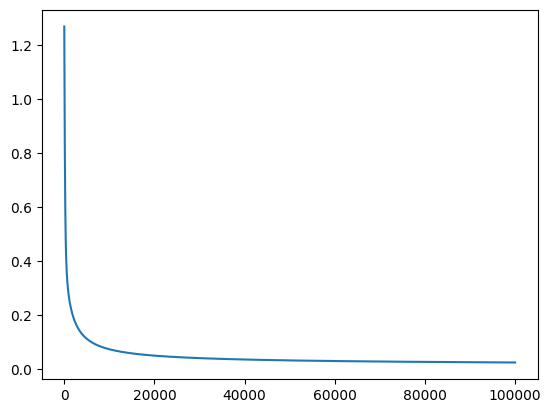

In [46]:
plt.plot(error_hist)

In [30]:
y_hat = logistic_regression(x_test_normalized, w)
accuracy(y_test, y_hat)

0.9927272727272727